# 신경망 모델 훈련

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/7-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 손실 곡선

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [2]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [3]:
model = model_fn()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


* [0, 0, 0, 0, 0, 0, 0, 1, 0, 0] -> categorical_crossentropy
* 7 -> sparce_categorical_crossentropy

verbose=1 -> 실행되는 것 보여줄지

In [4]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=10, verbose=1)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5292 - accuracy: 0.8129
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3931 - accuracy: 0.8582
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3580 - accuracy: 0.8716
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3351 - accuracy: 0.8804
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3223 - accuracy: 0.8843
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3095 - accuracy: 0.8884
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3017 - accuracy: 0.8922
Epoch 8/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2916 - accuracy: 0.8951
Epoch 9/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2824 - accuracy: 0.9012
Epoch 10/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.278

* history 변수에는 훈련 측정값이 딕셔너리 형태로 저장되어 있습니다. 
* 케라스는 기본적으로 에포크마다 손실을 계산합니다. 정확도는 compile() 메서드에서 metrics 매개변수에 'accuracy'를 추가했기 때문에 history 속성에 포함되었습니다. 

In [5]:
history

In [6]:
history.history

{'loss': [0.5291889905929565,
  0.39314985275268555,
  0.35799404978752136,
  0.33511635661125183,
  0.32229170203208923,
  0.309531033039093,
  0.3017234206199646,
  0.2916394770145416,
  0.28241419792175293,
  0.2785301208496094],
 'accuracy': [0.8129166960716248,
  0.8582083582878113,
  0.8715624809265137,
  0.8803541660308838,
  0.8843125104904175,
  0.8883958458900452,
  0.8921874761581421,
  0.895104169845581,
  0.9012083411216736,
  0.9029374718666077]}

In [7]:
history.history['loss']

[0.5291889905929565,
 0.39314985275268555,
 0.35799404978752136,
 0.33511635661125183,
 0.32229170203208923,
 0.309531033039093,
 0.3017234206199646,
 0.2916394770145416,
 0.28241419792175293,
 0.2785301208496094]

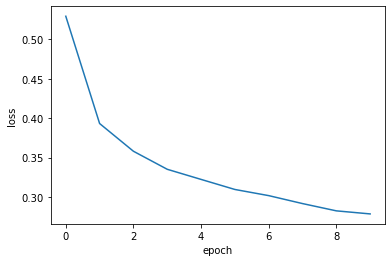

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.savefig('7_3-01', dpi=300)
plt.show()

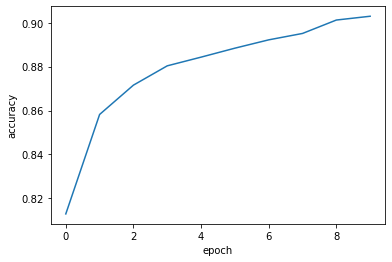

In [9]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.savefig('7_3-02', dpi=300)
plt.show()

In [10]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

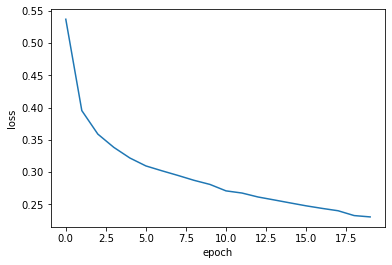

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.savefig('7_3-03', dpi=300)
plt.show()

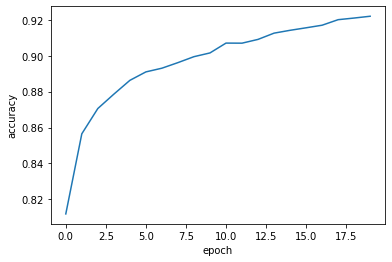

In [14]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.savefig('7_3-04', dpi=300)
plt.show()

In [15]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=1, 
                    validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5243 - accuracy: 0.8142 - val_loss: 0.3919 - val_accuracy: 0.8627
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3876 - accuracy: 0.8610 - val_loss: 0.3744 - val_accuracy: 0.8711
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3509 - accuracy: 0.8741 - val_loss: 0.3955 - val_accuracy: 0.8615
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3340 - accuracy: 0.8806 - val_loss: 0.3598 - val_accuracy: 0.8744
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3198 - accuracy: 0.8870 - val_loss: 0.3626 - val_accuracy: 0.8767
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3094 - accuracy: 0.8905 - val_loss: 0.4110 - val_accuracy: 0.8620
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2991 - accuracy: 0.8944 - val_loss: 0.3647 - val_accuracy:

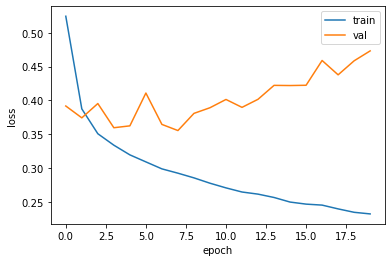

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('7_3-05', dpi=300)
plt.show()

0.35 쯤부터 오버피팅

## 검증 손실
* 에포크에 따른 과대적합과 과소적합을 파악하려면 훈련 세트에 대한 점수뿐만 아니라 검증 세트에 대한 점수도 필요합니다. 
* 따라서 앞에서처럼 훈련 세트의 손실만 그려서는 안됩니다. 

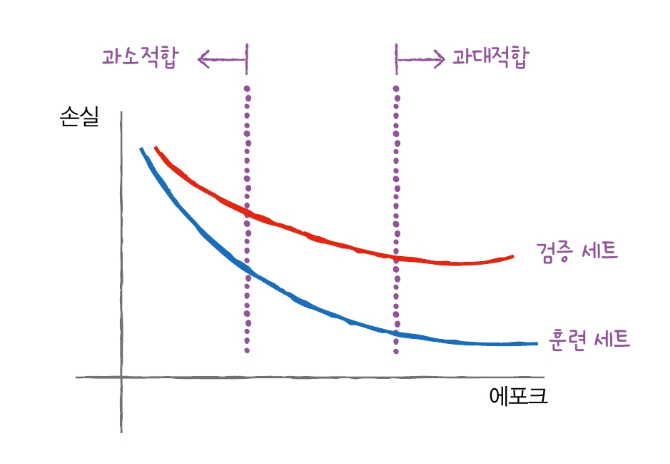

* 모델이 최적화하는 대상은 정확도가 아니라 손실 함수입니다. 이따금 손실 감소에 비례하여 정확도가 높아지지 않는 경우도 있습니다. 
* 따라서 모델이 잘 훈련되었는지 판단하려면 정확도보다는 손실 함수의 값을 확인하는 것이 더 낫습니다. 

* 5번째 에포크 만에 검증 손실이 상승하기 시작합니다. 
* 훈련 손실은 꾸준히 감소하기 때문에 전형적인 과대적합 모델이 만들어집니다. 
* 검증 손실이 상승하는 시점을 가능한 뒤로 늦추면 검증 세트에 대한 손실이 줄어들 뿐만 아니라 검증 세트에 대한 정확도도 증가할 것입니다. 

* 옵티마이저 하이퍼파라미터를 조정하여 과대적합을 완화시킬 수 있는지 확인해보겠습니다. 
* 기본 RMSprop 옵티마이저는 많은 문제에서 잘 동작합니다. 만약 이 옵티마이저 대신 다른 옵티마이저를 테스트해 본다면 Adam이 좋은 선택입니다. 
* Adam은 적응적 학습률을 사용하기 때문에 에포크가 진행되면서 학습률의 크기를 조정할 수 있습니다. 

In [17]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=1, 
                    validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5214 - accuracy: 0.8172 - val_loss: 0.4397 - val_accuracy: 0.8419
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3918 - accuracy: 0.8585 - val_loss: 0.3764 - val_accuracy: 0.8635
Epoch 3/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3513 - accuracy: 0.8723 - val_loss: 0.3712 - val_accuracy: 0.8665
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3241 - accuracy: 0.8816 - val_loss: 0.3321 - val_accuracy: 0.8813
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3037 - accuracy: 0.8879 - val_loss: 0.3434 - val_accuracy: 0.8778
Epoch 6/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2877 - accuracy: 0.8938 - val_loss: 0.3346 - val_accuracy: 0.8792
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2764 - accuracy: 0.8975 - val_loss: 0.3443 - val_accuracy:

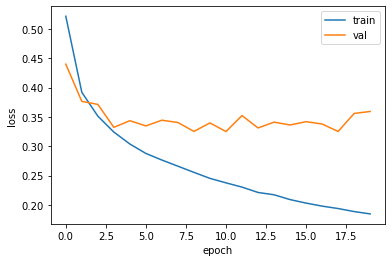

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('7_3-06', dpi=300)
plt.show()

15~16 번 에폭

## 드롭아웃
* 드롭아웃은 인공지능의 3대 거장 제프리 힌튼이 소개했습니다.
* 아래 그림처럼 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서(뉴런의 출력을 0으로 만들어) 과대적합을 막습니다. 

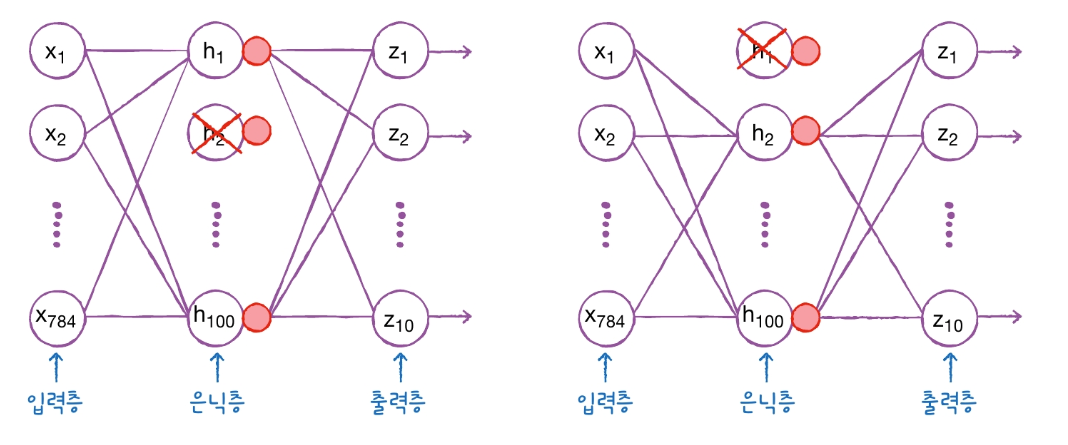

* 이전 층의 일부 뉴런이 랜덤하게 꺼지면 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고 모든 입력에 대해 주의를 기울여야 합니다. 
* 일부 뉴런의 출력이 없을 수 있다는 것을 감안하면 이 신경망은 더 안정적인 예측을 만들 수 있을 것입니다. 

In [19]:
model = model_fn(keras.layers.Dropout(0.3)) # 30프로를 없애고 70프로만

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=1, 
                    validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5976 - accuracy: 0.7913 - val_loss: 0.4296 - val_accuracy: 0.8455
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4414 - accuracy: 0.8412 - val_loss: 0.3907 - val_accuracy: 0.8566
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4053 - accuracy: 0.8533 - val_loss: 0.3619 - val_accuracy: 0.8661
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3844 - accuracy: 0.8587 - val_loss: 0.3700 - val_accuracy: 0.8635
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3667 - accuracy: 0.8652 - val_loss: 0.3436 - val_accuracy: 0.8729
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3527 - accuracy: 0.8704 - val_loss: 0.3455 - val_accuracy: 0.8737
Epoch 7/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3470 - accuracy: 0.8715 - val_loss: 0.3364 - val_accuracy:

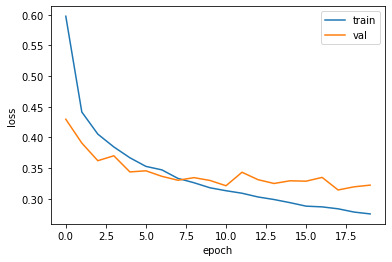

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('7_3-06', dpi=300)
plt.show()

## 모델 저장과 복원

In [25]:
model.weights[1]

<tf.Variable 'dense_8/bias:0' shape=(100,) dtype=float32, numpy=
array([ 0.292206, -0.285606,  0.571828,  0.158701, -0.223657, -0.469443,
        0.488285,  0.163324,  0.426152, -0.112781,  0.355211,  0.454348,
       -0.031922,  0.21132 , -0.37127 , -0.27096 ,  0.510711, -0.506529,
        0.659262,  0.424982, -0.021649,  0.35118 , -0.218369,  0.412051,
        0.850855,  0.871986, -0.189982,  0.319173,  0.442672,  0.393501,
        0.381041, -0.368418,  0.572781,  0.080978, -0.008768,  0.461526,
        0.562654, -0.015388, -0.165993, -0.004962, -0.665803,  0.410123,
       -0.04827 ,  0.43117 , -0.0383  , -0.548978,  0.712518, -0.462126,
        0.256187,  0.612199,  0.437362,  0.185572, -0.191243,  0.527833,
       -0.191493, -0.238808,  0.135599,  0.697747,  0.508362,  0.201206,
        0.110814, -0.530063,  0.701734, -0.215411,  0.443922,  1.090169,
       -0.435211,  0.103338, -0.139875,  0.612337, -0.461625,  0.32209 ,
        0.296143,  0.723392,  0.068982,  0.23199 ,  0.17659

블랙박스? 강사 : 무슨 숫잔지 나도 모르겠다.

* 케라스 모델은 훈련된 모델의 파라미터를 저장하는 간편한 save_weights() 메서드를 제공합니다. 
* 기본적으로 이 메서드는 텐서플로의 체크포인트 포맷으로 저장하지만 파일의 확장자가 h5일 경우 HDF5 포맷으로 저장합니다. 

In [ ]:
model.save_weights('model-weights.h5') # 구조는 따로 저장 안됨

model.weights

* 모델 구조와 모델 파라미터를 함께 저장하는 save() 메서드도 제공합니다. 
* 기본적으로 이 메서드는 텐서플로의 SavedModel 포맷으로 저장하지만 파일의 확장자가 h5일 경우 HDF5 포맷으로 저장합니다. 

In [ ]:
model.save('model-weights.h5')

* load_weights() 메서드를 사용하려면 save_weights() 메서드로 저장했던 모델과 정확히 같은 구조를 가져야 합니다. 
* 그렇지 않으면 에러가 발생합니다. 여기에서는 model_fn() 함수를 사용해 동일한 모델을 만들어 사용했습니다. 

* 아래 옵션은 과학적 표기법을 변경하는 옵션입니다. 

In [23]:
import numpy as np

In [24]:
import numpy as np
np.set_printoptions(precision=6, suppress=True)
# 6자리 까지만

* 모델의 predict() 메서드 결과에서 가장 큰 값을 고르기 위해 넘파이의 argmax() 함수를 사용합니다. 
* 이 함수는 배열에서 가장 큰 값의 인덱스를 반환합니다. 
* argmax() 함수의 axis=-1은 배열의 마지막 차원을 따라 최댓값을 선택합니다. 검증 세트는 2차원 배열이기 때문에 마지막 차원은 1이 됩니다. 

In [26]:
model.predict(val_scaled).shape

(12000, 10)

In [27]:
test_input[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [28]:
test_input[0] /= 255.0

ValueError: output array is read-only

In [29]:
test_scaled = test_input / 255.0

In [30]:
model.evaluate(test_input, test_target)

313/313 [==============================] - 1s 2ms/step - loss: 63.1286 - accuracy: 0.8640


[63.1285514831543, 0.8640000224113464]

In [31]:
model.predict(val_scaled)[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

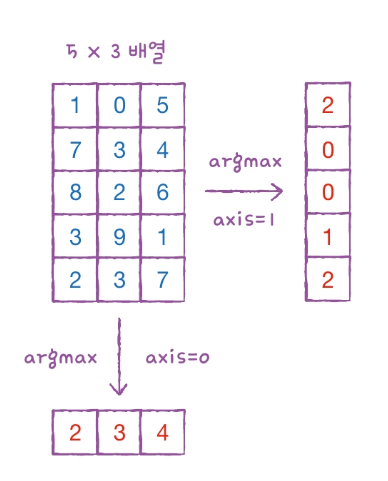

In [ ]:
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

## 콜백
* 콜백함수란 어떤 이벤트에 의해 호출되어지는 함수를 의미하고 케라스에서는 훈련 과정 중간에 어떤 작업을 수행할 때 사용합니다. 
* keras.callbacks 패키지 아래에 있는 클래스입니다. 
* fit() 메서드의 callbacks 매개변수에 리스트로 전달하여 사용합니다. 
* ModelCheckpoint 콜백은 기본적으로 최상의 검증 점수를 만드는 모델을 저장합니다. 
    * 저장될 파일 이름은 best-model.h5로 지정하여 콜백을 적용해 보겠습니다. 

In [32]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
                        # 가장 최상위 ??? 저장

model.fit(train_scaled, train_target, epochs=20, verbose=1, 
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5990 - accuracy: 0.7901 - val_loss: 0.4214 - val_accuracy: 0.8462
Epoch 2/20
  99/1500 [>.............................] - ETA: 2s - loss: 0.4624 - accuracy: 0.8371

KeyboardInterrupt: 

In [ ]:
model = keras.models.load_model('best-model.h5') # 가장 검증점수가 높은 모델을 저장하기로 했었음
# 텐서플로 2.3에서는 버그(https://github.com/tensorflow/tensorflow/issues/42890) 때문에 compile() 메서드를 호출해야 합니다.
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

model.evaluate(val_scaled, val_target)

* 에포크의 횟수 만큼 훈련을 진행하다보면 과적합이 발생하기 때문에 어느 시점 이상은 훈련을 계속할 필요성이 없어집니다. 
* 이때 훈련을 중지하면 컴퓨터 자원과 시간을 절약할 수 있습니다. 
* 이렇게 과대적합이 시작되기 전에 훈련을 미리 중지하는 것을 조기 종료(ealry stopping)라고 부릅니다. 
* 조기 종료는 훈련 에포크 횟수를 제한하는 역할이지만 모델이 과대적합되는 것을 막아주기 때문에 규제 방법 중 하나로 생각할 수도 있습니다. 
* 케라스에서는 EarlyStopping 콜백 함수를 제공합니다. 
* patience=2로 지정하면 2번 연속 검증 점수가 향상되지 않으면 훈련을 중지시킵니다. 
* restore_best_weights 매개변수를 True로 지정하면 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌립니다. 

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, 
                                                  restore_best_weights=True)
                # 얼리스탑 , 2번이상 검증점수가 높아지지않으면 중지
                # 가장 좋은모델 복원시켜줌

history = model.fit(train_scaled, train_target, epochs=20, verbose=1, 
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

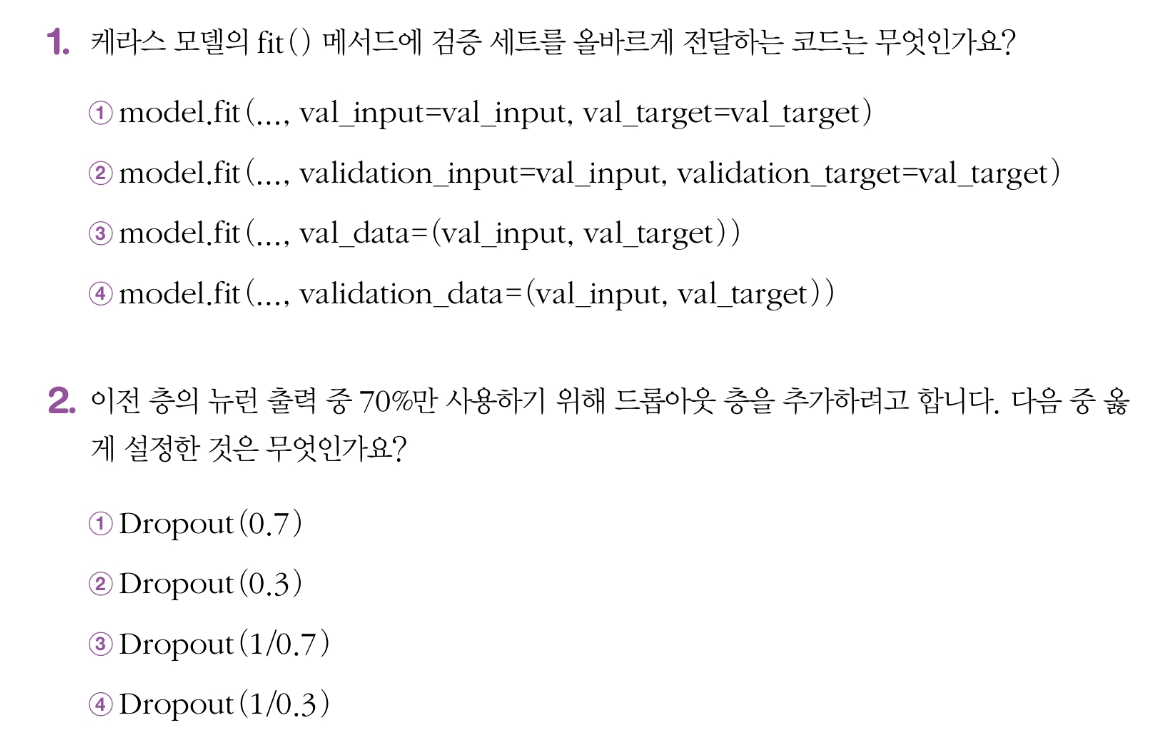

In [ ]:
4, 4 ?

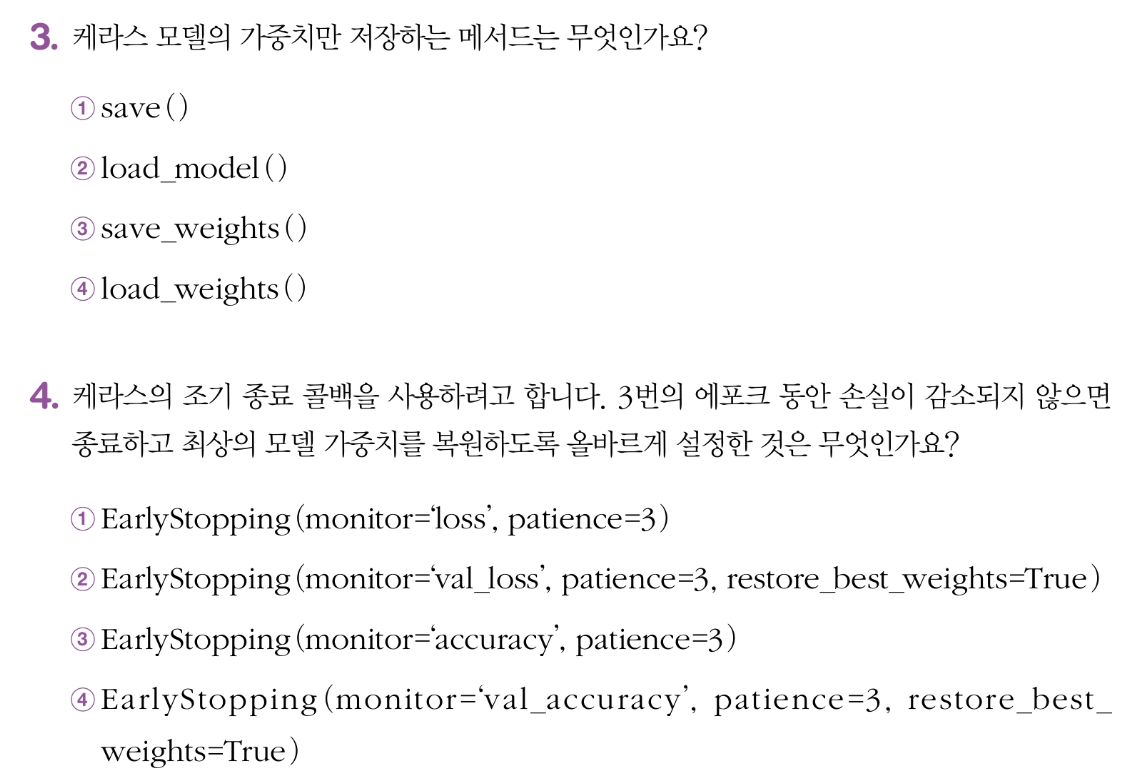

In [ ]:
3?, 2